# Data visualization in Python using seaborn

Today we'll go over some basic examples for plotting datasets in different ways using [seaborn](https://seaborn.pydata.org/), a plotting library that works really well with [pandas](https://pandas.pydata.org/) dataframes.

**Note:** Nearly all of the Markdown text function names are links to the documentation for the corresponding functions if you want to learn more about how to use each of these functions in more detail!

Before we get started, please copy this notebook to wherever you want to work on it using the following bash command.
```bash
cp /dfs6/pub/public-www/freese/cosmos/python_visualization.ipynb .
```

To get right into it, we'll first import the libraries we'll need as well as set some nice global plotting settings.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.decomposition import PCA


sns.set_context("paper", font_scale=2)

## Bar plots with Star Wars dataset

Bar plots are often used to display how many items in your dataset belong to each category. Here we'll use the different in-universe sexes from Star Wars to illustrate these types of plots.

In [5]:
df = pd.read_csv('/dfs6/pub/erebboah/cosmos/visualization/starwars.tsv', sep='\t')

In [6]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


How many characters of the different in-universe sexes are there? Using [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [`pandas.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

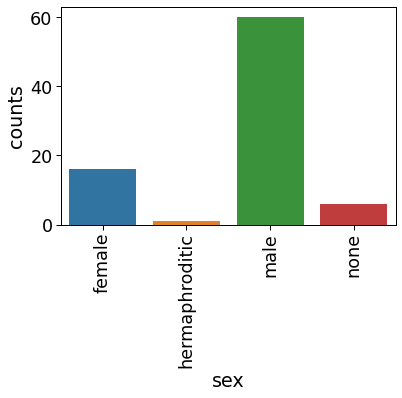

In [7]:
temp = df.groupby('sex').count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='sex', y='counts')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

Change some display settings of the plot - update the x and y labels.

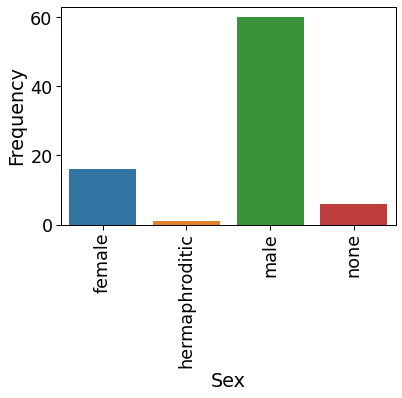

In [8]:
temp = df.groupby('sex').count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='sex', y='counts')
ax.set(ylabel='Frequency', xlabel='Sex')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

You can use the [`ax.set()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.set.html) function to change a lot of different display settings for your plot. Here we'll use it to also change the plot title as well as the x and y labels.

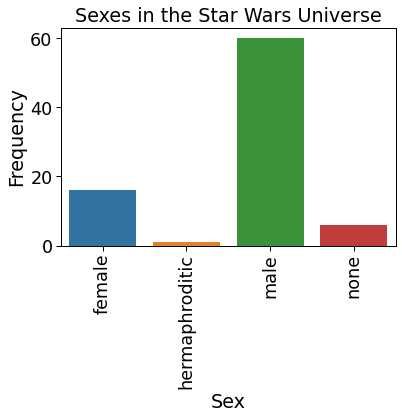

In [9]:
temp = df.groupby('sex').count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='sex', y='counts')
ax.set(ylabel='Frequency', xlabel='Sex', title='Sexes in the Star Wars Universe')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

Though seaborn automatically colors the different categories plotted, we can also give it a custom color map to dictate how the different categories are colored using the `palette` option (which is almost always a possibility when using seaborn plotting functions)

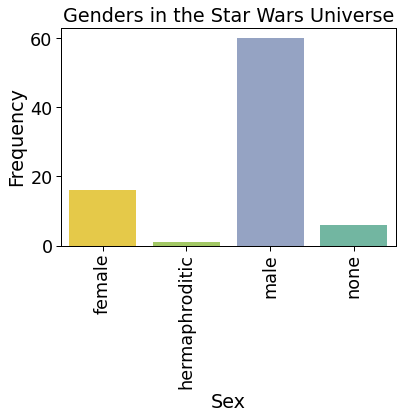

In [10]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal

temp = df.groupby('sex').count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='sex', y='counts', palette=c_dict)
ax.set(ylabel='Frequency', xlabel='Sex', title='Genders in the Star Wars Universe')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

We can choose to display this plot in the opposite orientation using the `orient=h` argument.

[Text(0, 0.5, 'Sex'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Sexes in the Star Wars Universe')]

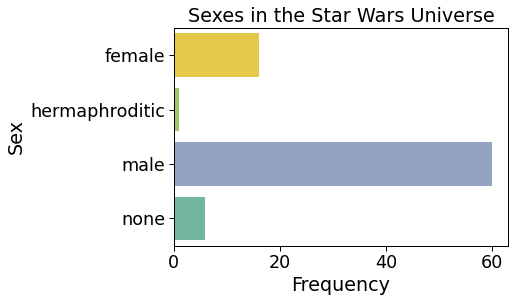

In [11]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal

temp = df.groupby('sex').count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='counts', y='sex', palette=c_dict, orient='h')
ax.set(ylabel='Sex', xlabel='Frequency', title='Sexes in the Star Wars Universe')

We can also choose to further subdivide our category population by subcategories, in this case by species using the `hue` argument and by tweaking our call to [`pandas.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

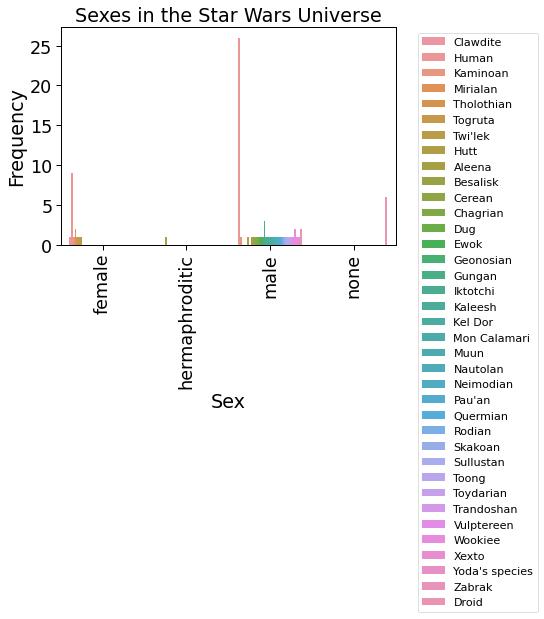

In [12]:
temp = df.groupby(['sex', 'species']).count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='sex', y='counts', hue='species')
ax.set(ylabel='Frequency', xlabel='Sex', title='Sexes in the Star Wars Universe')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

# move the ridiculous legend outside of the plotting area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

Since that is a bit of a mess though, let's limit the species to a handful so we can actually tell what's going on using [`pandas.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

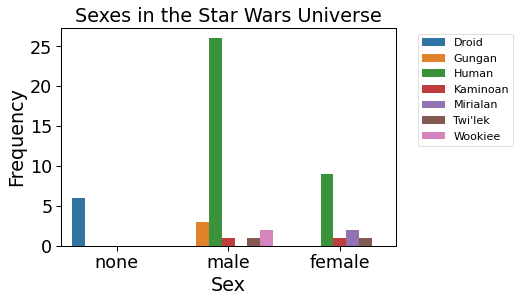

In [13]:
species_list = ['Human', 'Gungan', 'Mirialan', 'Wookiee',
                'Kaminoan', "Twi'lek", 'Droid']
temp = df.loc[df.species.isin(species_list)]
temp = temp.groupby(['species', 'sex']).count().reset_index()
temp.rename({'name': 'counts'}, axis=1, inplace=True)
ax = sns.barplot(data=temp, x='sex', y='counts', hue='species')
ax.set(ylabel='Frequency', xlabel='Sex', title='Sexes in the Star Wars Universe')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

# Box plots with the Star Wars dataset

Moving on, we can also look at **distributions** of data within our dataset. Here, we'll visualize the mass distributions of each character in our dataset separated by sex using [`seaborn.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

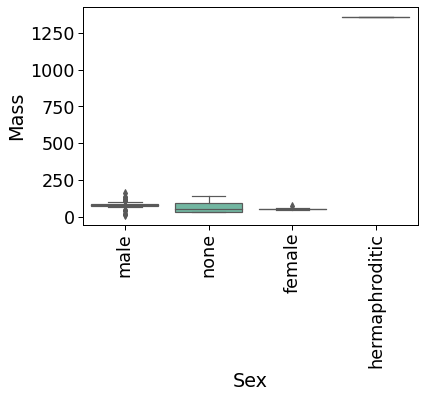

In [14]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal

ax = sns.boxplot(data=df, x='sex', y='mass', palette=c_dict)
ax.set(ylabel='Mass', xlabel='Sex')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

Since the "hermaphroditic" Jabba the Hutt weighs half a ton, it's a bit difficult to visualize the distrubutions and summary statistics from the box plots for the other categories above. To solve this, we could plot the y variables using a log scale with [`ax.set()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.set.html).

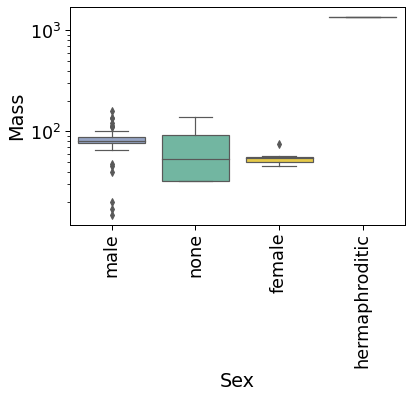

In [15]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal

ax = sns.boxplot(data=df, x='sex', y='mass', palette=c_dict)
ax.set(ylabel='Mass', xlabel='Sex', yscale='log')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

Or we could simply remove the outlier category, again by using [`pandas.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

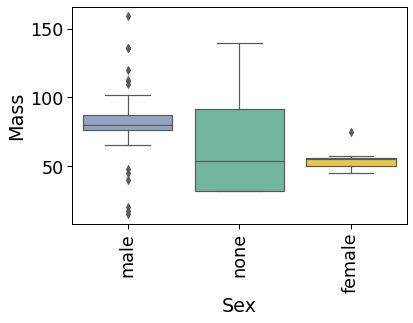

In [16]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'none': '#66C2A5'} # teal
temp = df.loc[df.sex.isin(['male', 'female', 'none'])]
ax = sns.boxplot(data=temp, x='sex', y='mass', palette=c_dict)
ax.set(ylabel='Mass', xlabel='Sex')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

We can also specify the order we want our categories to appear in using the `order` argument.

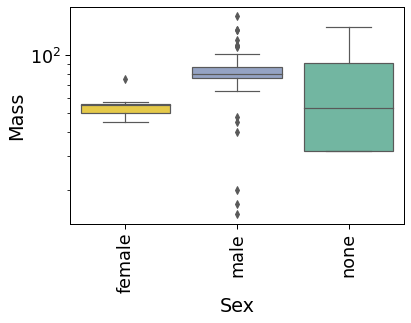

In [17]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'none': '#66C2A5'} # teal

temp = df.loc[df.sex.isin(['male', 'female', 'none'])]
ax = sns.boxplot(data=df, x='sex', y='mass', palette=c_dict,
                 order=['female', 'male', 'none'])
ax.set(ylabel='Mass', xlabel='Sex')
ax.set_yscale('log')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

We can also use a violin plot to visualize the distributions of mass per category with [`seaborn.violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Violin plots are freuqently used in genomics.

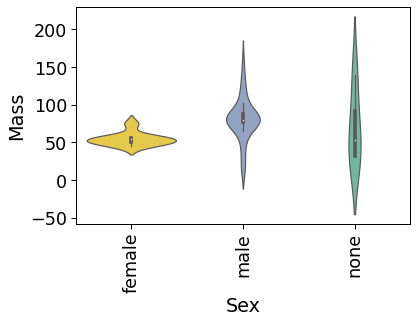

In [18]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'none': '#66C2A5'} # teal
temp = df.loc[df.sex.isin(['male', 'female', 'none'])]
ax = sns.violinplot(data=temp, x='sex', y='mass', palette=c_dict,
                 order=['female', 'male', 'none'])
ax.set(ylabel='Mass', xlabel='Sex')
_ = plt.setp(ax.get_xticklabels(), rotation=90)

# Distribution plots with the Star Wars dataset

What if we want to see what the distribution of individuals based on their mass is? For this we can use [`seaborn.displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot). First, we'll make a simple histogram. The parameters for things like binwidth are completely tunable from the function.

In [19]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


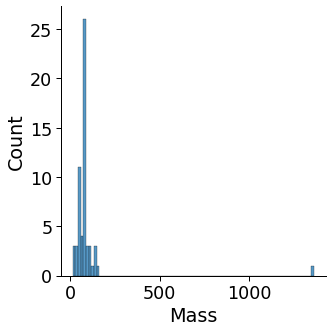

In [20]:
ax = sns.displot(data=df, x='mass', kind='hist')
ax.set(xlabel='Mass')

As you can see, Jabba the Hutt is still an outlier. We can fix this by adjusting the x limit using [`ax.set()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.axes.Axes.set.html) once again.

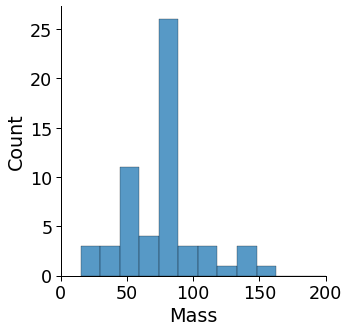

In [21]:
ax = sns.displot(data=df, x='mass', kind='hist')
ax.set(xlabel='Mass', xlim=(0,200))

Again, we can also split based on another category using the `hue` argument.

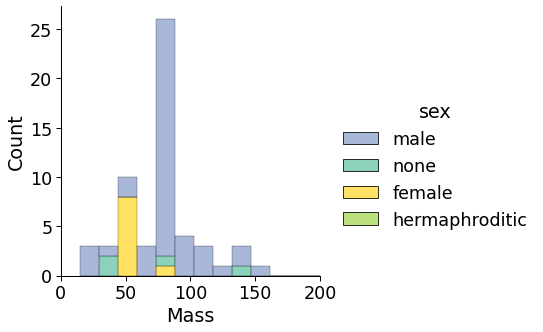

In [22]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal
ax = sns.displot(data=df, x='mass', kind='hist',
                 hue='sex', palette=c_dict, multiple='stack')
ax.set(xlabel='Mass', xlim=(0,200))

Alternatively, we can choose to display this using a kernel density estimate (KDE), which is a smoother representation of the underlying distribution.

/opt/apps/python/3.8.0/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


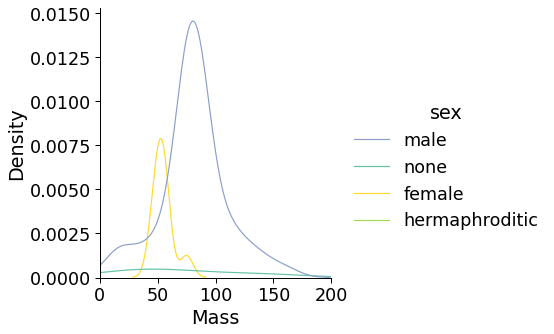

In [23]:
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal
ax = sns.displot(data=df, x='mass', kind='kde',
                 hue='sex', palette=c_dict)
ax.set(xlabel='Mass', xlim=(0,200))

# Scatter plots with the mpg (miles per gallon) dataset

We'll now look at the different type of scatterplots we can make with the mpg dataset, where each entry is a different type of car.

In [24]:
df = pd.read_csv('/dfs6/pub/erebboah/cosmos/visualization/mpg.tsv', sep='\t')

In [25]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


First we'll just look at the relationship between "displ" and "hwy", (neither of which I actually know what they mean because I am not a car person) using [`seaborn.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

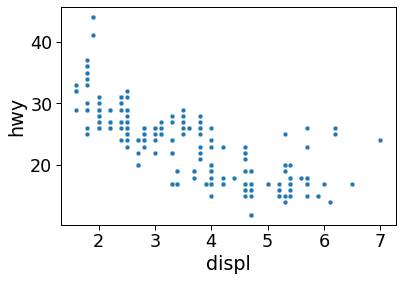

In [26]:
ax = sns.scatterplot(data=df, x='displ', y='hwy')

We can also give [`seaborn.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) a hue argument to color each point based on the class of car it belongs to (or another categorical variable).

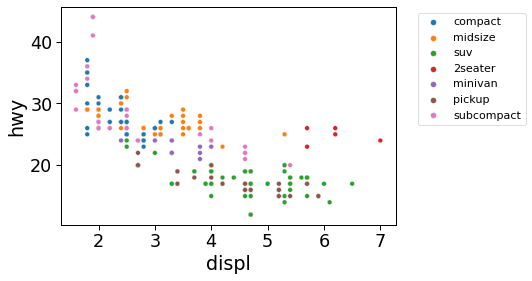

In [27]:
ax = sns.scatterplot(data=df, x='displ', y='hwy', hue='class')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

A similar function you can use is [`seaborn.jointplot`](http://seaborn.pydata.org/generated/seaborn.jointplot.html) which will display your data in a scatterplot with the marginal distributions of the plotted x and y variables displayed on the top and right of the plot.

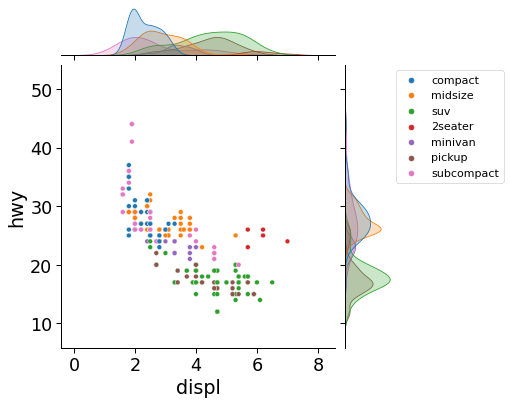

In [28]:
ax = sns.jointplot(data=df, x='displ', y='hwy', hue='class')
ax.ax_joint.legend(bbox_to_anchor=(1.2, 1), loc='upper left', fontsize='xx-small')

You can also choose to display the different classes as something different, here we've chosen size of the point (`size` argument, which is not a great way to distinguish them, but it's still possible!). This plotting options might be better for displaying points of data that are numerical and not categorical.

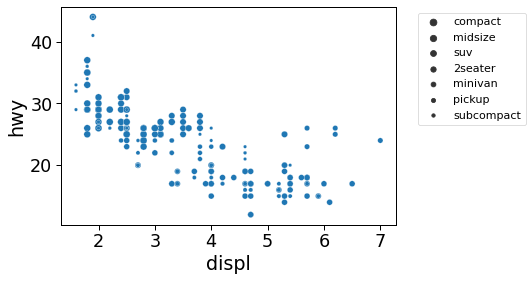

In [29]:
ax = sns.scatterplot(data=df, x='displ', y='hwy', size='class')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

We can also just change the style of the plotted markers using the `style` argument.

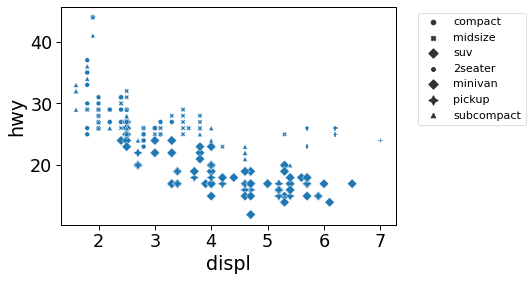

In [30]:
ax = sns.scatterplot(data=df, x='displ', y='hwy', style='class')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

You can also use the [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) function to fit a trendline (here polynomial order 2) to your scattered data.

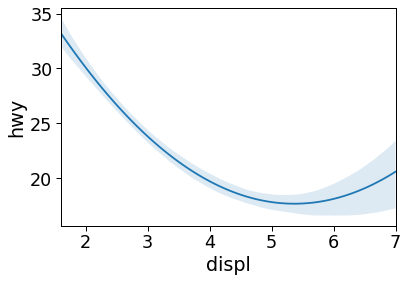

In [31]:
ax = sns.regplot(data=df, x='displ', y='hwy',
            scatter=False, order=2)

You can also plot your regression line along with the original scattered datapoints.

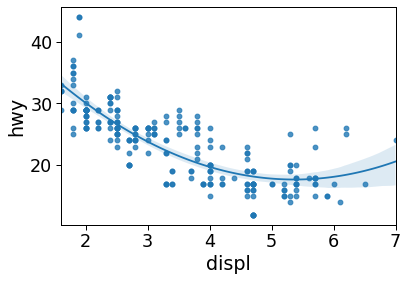

In [32]:
ax = sns.regplot(data=df, x='displ', y='hwy',
            scatter=True, order=2)

And to plot multiple regression lines split by an additional category, here `drv`, you can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

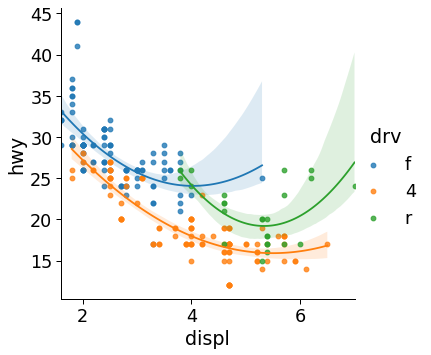

In [33]:
ax = sns.lmplot(data=df, x='displ', y='hwy', hue='drv',
            scatter=True, order=2)

# PCA (principal component analysis) plots with the Iris dataset

In [34]:
df = pd.read_csv('/dfs6/pub/erebboah/cosmos/visualization/iris.tsv', sep='\t')

In [35]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


First we actually have to perform PCA on the dataset. Here we'll do it with n=4 dimensions so you'll see how the variance ratios with the total number of dimensions add up to 1. I used [this tutorial](https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/) to figure out how to get PCA to work.

In [36]:
cols = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
data = df[cols].values
pca = PCA(4)
pca.fit(data)

print(pca.components_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]
[0.92461872 0.05306648 0.01710261 0.00521218]
1.0


Then we can use [`seaborn.catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) to examine how much of the variance in the dataset is captured by each principal component.

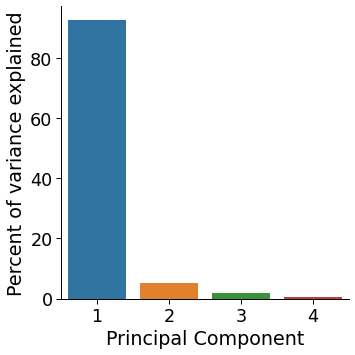

In [37]:
pca_df = pd.DataFrame(data=pca.explained_variance_ratio_,
                      columns=['prop_variance'])

# compute percent variance from proportion variance
pca_df['perc_variance'] = pca_df.prop_variance*100
pca_df['PC'] = [i for i in range(1,len(pca_df.index)+1)]
pca_df

ax = sns.catplot(data=pca_df, x='PC', y='perc_variance', kind='bar')
ax.set(ylabel='Percent of variance explained', xlabel='Principal Component')

We can use [`seaborn.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to visualize each of the different data points in 2 dimensions instead of in 4 (which would be difficult). 

In [38]:
# first calculate the PCA representation of the data
pca_data = pca.transform(data) 
cols = ['PC{} ({:.1f}%)'.format(pc, var) for pc, var in zip(pca_df.PC, pca_df.perc_variance)]
print(cols)
pca_df = pd.DataFrame(data=pca_data, columns=cols)

# concatenate PC calculations with the original dataframe
pca_df = pd.concat([df, pca_df], axis=1)
pca_df.head()

['PC1 (92.5%)', 'PC2 (5.3%)', 'PC3 (1.7%)', 'PC4 (0.5%)']


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,PC1 (92.5%),PC2 (5.3%),PC3 (1.7%),PC4 (0.5%)
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0.090079,0.061259


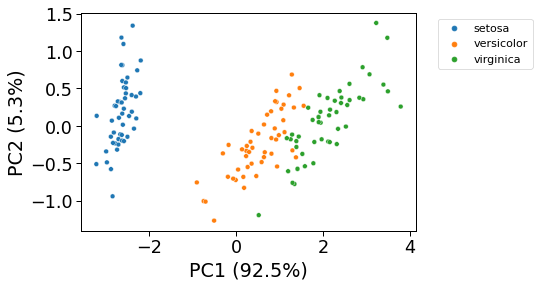

In [39]:
ax = sns.scatterplot(data=pca_df, x=cols[0], y=cols[1], hue='Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

See how the different irises of the same species group really well together this way? These are the sort of trends that can be captured using PCA.

We can also plot the 2nd and 3rd PCs, which I'm here grabbing using the `cols` variable.

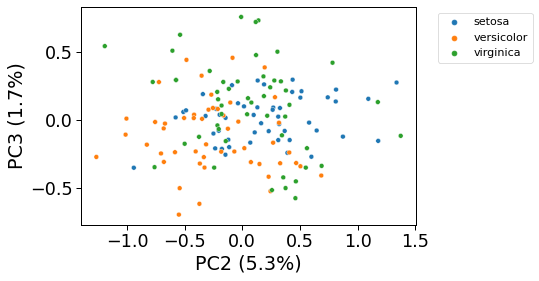

In [40]:
ax = sns.scatterplot(data=pca_df, x=cols[1], y=cols[2], hue='Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

As you can see the different species don't separate out nearly as well as the first 2.

Of course we can also add some beautification to the plot with varied marker color and style per species.

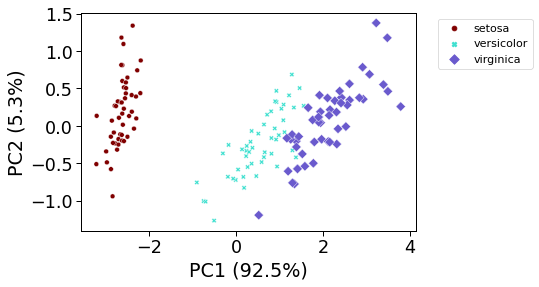

In [41]:
c_dict = {'setosa': 'maroon', # maroon
          'versicolor': 'turquoise', # turquoise
          'virginica': 'slateblue'} # blue
ax = sns.scatterplot(data=pca_df, x=cols[0], y=cols[1], \
                     hue='Species', palette=c_dict, style='Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')

# Some real world examples

In [42]:
fname = '/dfs6/pub/erebboah/cosmos/visualization/DilPlate_Smar13880.txt'
df = pd.read_csv(fname, sep='\t')

In [43]:
df.head()

,OD,Day,CFU,InjDate
0,0.05,2,2833,5/18/19
1,0.05,2,8083,5/18/19
2,0.05,2,1022,5/18/19
3,0.05,2,5472,5/18/19
4,0.05,2,5250,5/18/19


Here, we're going to plot some datapoints using [`seaborn.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and overlay a lineplot using [`seaborn.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html) on top of it.

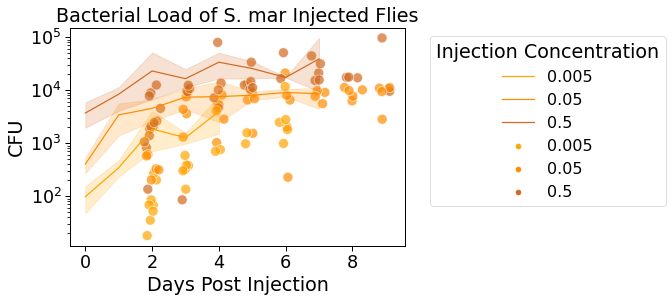

In [44]:
c_dict = {0.5: 'chocolate',
          0.05: 'darkorange',
          0.005: 'orange'}

def jitter(values,j):
    return values + np.random.normal(j,0.1,values.shape)

ax = sns.scatterplot(data=df, x=jitter(df.Day,2), y=jitter(df.CFU,2),
                     hue='OD', palette=c_dict, 
                     alpha=0.7, s=100)
sns.lineplot(data=df, x='Day', y='CFU', hue='OD', 
             palette=c_dict, ax=ax)

ax.set(xlabel='Days Post Injection', title='Bacterial Load of S. mar Injected Flies')
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize='small', title='Injection Concentration')


In [56]:
fname = '/dfs6/pub/erebboah/cosmos/visualization/cv4FULL_tpms.txt'
df = pd.read_csv(fname, sep='\t')
df.set_index('GeneID', inplace=True)

# drop unexpressed genes
df = df.loc[df.sum(axis=1) != 0]

# order based on expression so we can geet some highly-expressed guys
# (but usually for these you'll want to curate the set of genes in a more intelligent way)
df['total'] = df.sum(axis=1)
df.sort_values(by='total', ascending=False, inplace=True)
df.drop('total', axis=1, inplace=True)

df = df.transpose()

In [57]:
df.head()

GeneID,NR_004015.1,NR_004023.1,NR_004025.1,NR_002493.3,NR_133553.1,NR_133555.1,NR_133550.1,NM_143723.3,NM_001201981.2,NR_133562.1,...,NM_001259986.1,NM_001201953.3,NM_001144185.2,NM_165146.2,NM_176447.2,NM_001103771.4,NM_079009.3,NM_001260460.2,NM_001272430.1,NM_001260242.2
B384,540373.0,73388.2,69237.3,18617.4,17728.4,21541.80,9311.430,589.670,6854.61,6264.180,...,0.0,0.0,0.0,0.0,2.415950e-10,0.0,0.0,0.0,0.0,0.0
B386,464750.0,54534.7,56823.2,22305.3,12634.6,22446.80,4220.920,981.401,10493.20,9332.780,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
B387,392371.0,60843.3,53027.0,20759.5,19107.4,1627.86,234.036,17107.300,5235.58,267.892,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
B400,545905.0,63135.8,63510.7,19488.5,19082.9,5024.23,22239.700,436.984,4780.20,4693.550,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
B402,464024.0,92948.1,60655.5,21826.8,11128.8,6897.09,20089.200,833.443,7720.36,11397.900,...,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0


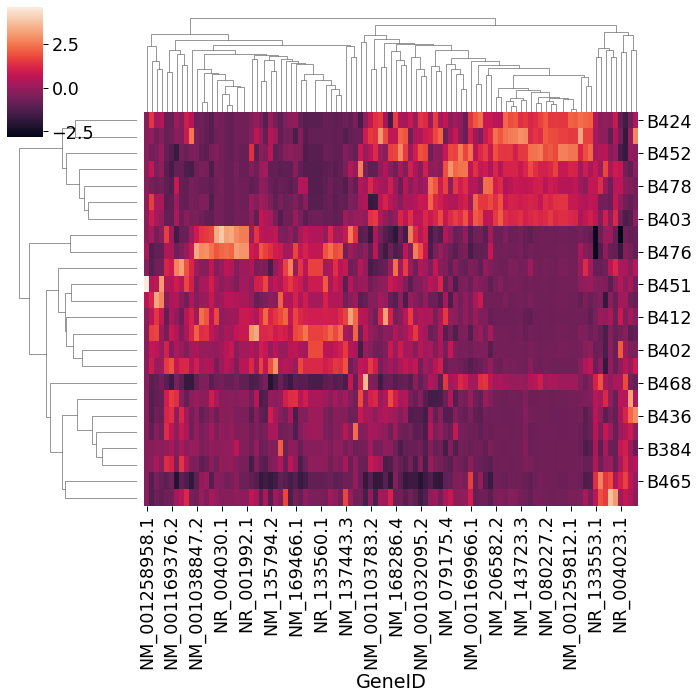

In [60]:
# just show a few genes
temp = df[df.columns[1:100]]
ax = sns.clustermap(data=temp, z_score=1)